<a href="https://colab.research.google.com/github/HKyeol/DataScience/blob/main/Coin_Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 동전을 던져서 앞면이 나올 확률.(오버플로우문제)
coin_prob(던지는 횟수, N회만 나오는 경우)



In [ ]:
def coin_prob1(N,num1):
  import numpy as np
#  num1 = int(input('몇개가 뽑혔을 때의 확률을 알고싶나요?'))
#  N = int(input('몇번 던지실 건가요?'))

  P = 0.5
  Q = 1-P

  if num1 > N:
    print('던진 숫자보다 많이 뽑힐 수 없습니다.')
  else:
    cnt = 1
    cnt2 = 1
    cnt3 = 1

    for i in range(N,0,-1):
      cnt *= i
      if i == num1:
        for j in range(num1,0,-1):
          cnt2 *= j
      if i == N - num1:
        for k in range(N-num1,0,-1):
          cnt3 *= k
    print(cnt)
    print(cnt2)
    print(cnt3)
    nCr = cnt/(cnt2*cnt3)
    prob = P**num1*Q**(N-num1)
    print(f'{nCr*prob*100}%')

# nCr에서 n!과 n-r!을 서로 상쇄함으로 계산문제를 완화(여전히 오버플로우)

In [ ]:
def coin_prob2(N,num1):
  import numpy as np
#  num1 = int(input('몇개가 뽑혔을 때의 확률을 알고싶나요?'))
#  N = int(input('몇번 던지실 건가요?'))

  P = 0.5
  Q = 1-P

  if num1 > N:
    print('던진 숫자보다 많이 뽑힐 수 없습니다.')
  else:
    cnt = 1
    cnt2 = 1

    if num1 < N - num1:  # 확률이 정확히 같은 코인에서만 가능합니다! 속도를 위해 넣었습니다. 확률이 바뀌는 경우 이부분을 수정해주어야 합니다!
      num1 = N - num1

    for i in range(N,num1,-1):
      cnt *= i
    for j in range(N-num1,0,-1):
      cnt2 *= j

    nCr = cnt/cnt2
    prob = P**N        # 확률이 정확히 같은 코인에서만 가능합니다! 확률이 바뀌는 경우 P**num1*Q**(N-num1)로 수정해주어야 합니다.
    print(f'{nCr*prob*100}%')

In [ ]:
coin_prob(10000,200)

이래도 오버플로가 일어난다. 로그로 가자

# 로그를 이용한 오버플로우 해결 ★

In [ ]:
def coin_prob(N,num1):
  import numpy as np
  import math as m
#  num1 = int(input('몇개가 뽑혔을 때의 확률을 알고싶나요?'))
#  N = int(input('몇번 던지실 건가요?'))

  P = 0.5
  Q = 1-P

  if num1 > N:
    print('던진 숫자보다 많이 뽑힐 수 없습니다.')
  else:
    cnt = m.log10(1)
    cnt2 = m.log10(1)

    if num1 < N - num1:  # 확률이 정확히 같은 코인에서만 가능합니다! 속도를 위해 넣었습니다. 확률이 바뀌는 경우 이부분을 수정해주어야 합니다!
      num1 = N - num1

    for i in range(N,num1,-1):
      cnt += m.log10(i)
    for j in range(N-num1,0,-1):
      cnt2 += m.log10(j)
    nCr = cnt-cnt2
    prob = m.log10(P)*N        # 확률이 정확히 같은 코인에서만 가능합니다! 확률이 바뀌는 경우 P**num1*Q**(N-num1)로 수정해주어야 합니다.
    return(f'{10**(nCr+prob)*100}%')
#    print(f'{nCr*prob*100}%') # 로그보다 로그10이 더 빠른 것같다. 그러면 로그2는? 로그2가 좀 더 빠르다 근데 답이 달라지네 수정해야겠다.

In [ ]:
coin_prob(100000000,50000000)

0.007979623292977342%


# 신뢰구간으로 나타내기 ★

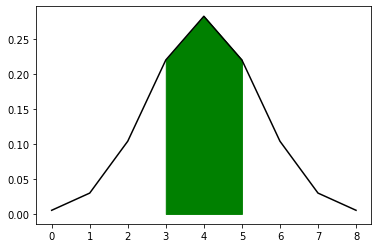

동전을  8번 던졌을 때 뒷면이 나오는 횟수가 4번이 나올 확률은 신뢰구간 68% 안에 있습니다. 


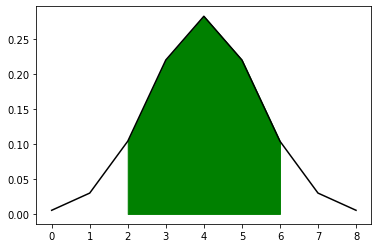

동전을  8번 던졌을 때 뒷면이 나오는 횟수가 7번이 나올 확률은 신뢰구간 95% 안에 없습니다. 


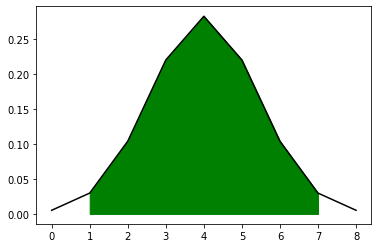

동전을  8번 던졌을 때 뒷면이 나오는 횟수가 7번이 나올 확률은 신뢰구간 98% 안에 있습니다. 


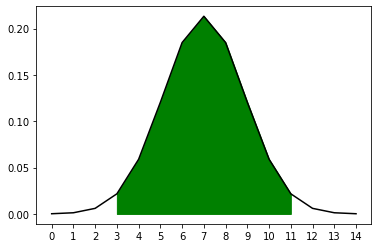

동전을  14번 던졌을 때 뒷면이 나오는 횟수가 7번이 나올 확률은 신뢰구간 98% 안에 있습니다. 


In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

def log_Factorial(n,end=0): # 팩토리얼 계산. 계산속도향상을 위해서 log값을 취함
    if n == 0 or n == 1:
        return 0
    elif n == end+1:
        return math.log10(n)
    else:
        return log_Factorial(n-1,end) + math.log10(n)

def Coin_Probability(r,n): # r = 뒷면 횟수 nCr을 통한 이항분포의 확률계산
    # nCr*p^r*q^(n-r) = n번 던져서 r번 나올 확률
    if r < n-r:
        r = n-r
    nCr = log_Factorial(n,n-r)/log_Factorial(r)
    p = 0.5
    q = 1-p
    return nCr*(p**r)*(q**(n-r))

def Coin_hypo(r,n=8,a=1): # 뒷면이 나온 횟수,던진횟수 8 기본값, 신뢰구간 68%기본값
    result = []
    for i in range(n+1):
        result.append(Coin_Probability(i,n))
    coin_cnt = [i for i in range(n+1)]

    p = 0.5                 # 이항분포의 확률
    q = 1-p                 
    c_m = n*p               # 이항분포의 평균
    c_s = math.sqrt(n*p*q)  # 이항분포의 표준편차
    c_m = np.float64(c_m)   # plot에서 float형태는 받아들이지 않지만 np.float64형태는 받아들여서 type 변경
    c_s = np.float64(c_s)

    result = norm.pdf(coin_cnt,c_m,c_s)        # 확률밀도함수
    plt.plot(coin_cnt, result,color = 'black')
    plt.xticks(range(0,n+1))
    plt.fill_between(coin_cnt,result,where = (coin_cnt < c_m+a*c_s)&(coin_cnt >= c_m-a*c_s),color = 'green')
    plt.show()

    ci = 68         # print에서 신뢰구간 자동 변경을 위해 작성
    if a == 1.96:
        ci = 95
    elif a == 2.58:
        ci = 98

    if c_m-a*c_s < r< c_m+a*c_s :
        print(f'동전을  {n}번 던졌을 때 뒷면이 나오는 횟수가 {r}번이 나올 확률은 신뢰구간 {ci}% 안에 있습니다. ')
    else:
        print(f'동전을  {n}번 던졌을 때 뒷면이 나오는 횟수가 {r}번이 나올 확률은 신뢰구간 {ci}% 안에 없습니다. ')


Coin_hypo(4)
Coin_hypo(7, a=1.96)
Coin_hypo(7, a=2.58)
Coin_hypo(7,n=14, a=2.58)

로그를 취해주니 오버플로우를 해결하고 10만단위로 처리할 수 있었다.  
만약 숫자가 더 커진다면 Monte-Carlo 모형으로 랜덤처리할 수 밖에 없을 것 같다.

# Monte-Carlo 모형을 이용한 오버플로우 해결(Computational cost 과다 지불)



In [ ]:
def coin_prob3(N,num):
  import numpy as np
  coin = ['앞면','뒷면']
  cnt = 0
    
  for k in range(1,1001):
    a =[]
    for i in range(1,N+1):
      result = np.random.choice(coin)
      a.append(result)

    if a.count('앞면')== num:
      cnt += 1
  return cnt/1000

In [ ]:
coin_prob(1000,500)

KeyboardInterrupt: ignored

계산비용이 과다 지불되어 작동하지 않는다.

# 동전을 던져서 a < r < b 사이가 될 확률
